In [ ]:
# Swapping Auto Encoder using PyTorch
# Semantic Segmentation on MIT ADE20K dataset in PyTorch

<strong>Loading the PSPNET model:</strong>

In [ ]:
%%bash
# Colab-specific setup
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit 
pip install yacs 2>&1 >> install.log
git init 2>&1 >> install.log
git remote add origin https://github.com/CSAILVision/semantic-segmentation-pytorch.git 2>> install.log
git pull origin master 2>&1 >> install.log
DOWNLOAD_ONLY=1 ./demo_test.sh 2>> install.log

From https://github.com/CSAILVision/semantic-segmentation-pytorch
 * branch            master     -> FETCH_HEAD


In [ ]:
import scipy.io
import cv2

mat = scipy.io.loadmat('data/color150.mat')

print(mat['colors'][1])
for i in range(len(mat['colors'])):
    mat['colors'][i] = [0, 0, 0]
mat['colors'][1] = [255, 255, 255] #originally it is 180 120 120
print(mat['colors'][1])
scipy.io.savemat('data/color150_white.mat',mat)

for i in range(len(mat['colors'])):
    mat['colors'][i] = [255, 255, 255]
mat['colors'][1] = [0, 0, 0] #originally it is 180 120 120
print(mat['colors'][1])
scipy.io.savemat('data/color150_black.mat',mat)

[180 120 120]
[255 255 255]
[0 0 0]


In [ ]:
# System libs
import os, csv, torch, numpy, scipy.io, PIL.Image, torchvision.transforms
# Our libs
from mit_semseg.models import ModelBuilder, SegmentationModule
from mit_semseg.utils import colorEncode

colors = scipy.io.loadmat('data/color150_white.mat')['colors']
names = {}
with open('data/object150_info.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        names[int(row[0])] = row[5].split(";")[0]

def visualize_result(img, pred, index=None):
    # filter prediction class if requested
    if index is not None:
        pred = pred.copy()
        pred[pred != index] = -1
        print(f'{names[index+1]}:')
        
    # colorize prediction
    pred_color = colorEncode(pred, colors).astype(numpy.uint8)

    # aggregate images and save
    im_vis = numpy.concatenate((img, pred_color), axis=1)
    #display(PIL.Image.fromarray(im_vis))
    return PIL.Image.fromarray(im_vis)

In [ ]:
# Network Builders
net_encoder = ModelBuilder.build_encoder(
    arch='resnet50dilated',
    fc_dim=2048,
    weights='ckpt/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth')
net_decoder = ModelBuilder.build_decoder(
    arch='ppm_deepsup',
    fc_dim=2048,
    num_class=150,
    weights='ckpt/ade20k-resnet50dilated-ppm_deepsup/decoder_epoch_20.pth',
    use_softmax=True)

crit = torch.nn.NLLLoss(ignore_index=-1)
segmentation_module = SegmentationModule(net_encoder, net_decoder, crit)
segmentation_module.eval()
segmentation_module.cuda()

Loading weights for net_encoder
Loading weights for net_decoder


SegmentationModule(
  (encoder): ResnetDilated(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): SynchronizedBatchNorm2d(128, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): SynchronizedBatchNorm2d(64, eps=1

<strong>Loading SAE:</strong>

In [ ]:
#!pip3 install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio===0.9.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install dominate torchgeometry func-timeout tqdm matplotlib opencv_python lmdb numpy GPUtil Pillow scikit-learn visdom ninja

In [ ]:
!git clone https://github.com/taesungp/swapping-autoencoder-pytorch/

Cloning into 'swapping-autoencoder-pytorch'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 179 (delta 79), reused 124 (delta 44), pack-reused 0
Receiving objects: 100% (179/179), 3.99 MiB | 17.18 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [ ]:
cd swapping-autoencoder-pytorch/

/content/swapping-autoencoder-pytorch


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil, os
if os.path.exists("/content/drive/MyDrive/SAE/swapping_autoencoder_models_and_test_images.zip"):
  print("file exists. Extracting from your drive")
  shutil.copy("/content/drive/MyDrive/SAE/swapping_autoencoder_models_and_test_images.zip", "/content/swapping-autoencoder-pytorch/swapping_autoencoder_models_and_test_images.zip")
  !unzip swapping_autoencoder_models_and_test_images
else:
  print("file doesn't exist. Downloading from the source")
  !wget http://efrosgans.eecs.berkeley.edu/SwappingAutoencoder/swapping_autoencoder_models_and_test_images.zip

file exists. Extracting from your drive
Archive:  swapping_autoencoder_models_and_test_images.zip
   creating: checkpoints/
   creating: checkpoints/ffhq1024_pretrained/
  inflating: checkpoints/ffhq1024_pretrained/latest_checkpoint.pth  
   creating: checkpoints/ffhq512_pretrained/
  inflating: checkpoints/ffhq512_pretrained/latest_checkpoint.pth  
   creating: checkpoints/bedroom_pretrained/
  inflating: checkpoints/bedroom_pretrained/latest_checkpoint.pth  
   creating: checkpoints/church_pretrained/
  inflating: checkpoints/church_pretrained/latest_checkpoint.pth  
   creating: checkpoints/mountain_pretrained/
  inflating: checkpoints/mountain_pretrained/latest_checkpoint.pth  
   creating: testphotos/
   creating: testphotos/ffhq512/
   creating: testphotos/ffhq512/fig9/
   creating: testphotos/ffhq512/fig9/style/
  inflating: testphotos/ffhq512/fig9/style/portrait-3796297_0.png  
  inflating: testphotos/ffhq512/fig9/style/man-wearing-white-dress-shirt-and-black-blazer-2182970_0.p

In [ ]:
!mkdir my_dataset
!mkdir my_dataset/content
!mkdir my_dataset/historified
!mkdir my_dataset/test_set  

In [ ]:
!unzip /content/drive/MyDrive/SAE/content_dataset.zip -d /content/swapping-autoencoder-pytorch/my_dataset/content

Archive:  /content/drive/MyDrive/SAE/content_dataset.zip
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/content/image_78.jpg  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/content/image_79.jpg  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/content/image_80.jpg  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/content/image_81.jpg  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/content/image_82.jpg  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/content/image_83.jpg  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/content/image_84.jpg  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/content/image_85.jpg  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/content/image_86.jpg  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/content/image_87.jpg  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/content/image_88.jpg  
  inflat

In [ ]:
!unzip /content/drive/MyDrive/SAE/training_dataset_processed.zip -d /content/swapping-autoencoder-pytorch/my_dataset/historified

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/historified/image_50_style_0.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/historified/image_50_style_1.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/historified/image_50_style_2.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/historified/image_50_style_3.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/historified/image_50_style_4.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/historified/image_50_style_5.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/historified/image_50_style_6.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/historified/image_50_style_7.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/historified/image_50_style_8.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/historified/image_

In [ ]:
!unzip /content/drive/MyDrive/SAE/test_dataset_processed.zip -d /content/swapping-autoencoder-pytorch/my_dataset/test_set

Archive:  /content/drive/MyDrive/SAE/test_dataset_processed.zip
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/test_set/image_0_style_1.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/test_set/image_0_style_2.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/test_set/image_0_style_3.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/test_set/image_0_style_4.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/test_set/image_0_style_5.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/test_set/image_0_style_7.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/test_set/image_0_style_14.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/test_set/image_0_style_26.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/test_set/image_0_style_86.png  
  inflating: /content/swapping-autoencoder-pytorch/my_dataset/test_set/image_0_style_94.png  
  

In [ ]:
os.rename("/content/swapping-autoencoder-pytorch/checkpoints/church_pretrained","/content/swapping-autoencoder-pytorch/checkpoints/church_default")

In [ ]:
def visualize_result(img, pred, index=None):
    if index is not None:
        pred = pred.copy()
        pred[pred != index] = -1
        print(f'{names[index+1]}:')
    pred_color = colorEncode(pred, colors).astype(numpy.uint8)
    im_vis = numpy.concatenate((img, pred_color), axis=1)
    return im_vis
    return PIL.Image.fromarray(im_vis)
    #display(PIL.Image.fromarray(im_vis))

In [ ]:
def return_building_images_from_localfile(img):
  # Load and normalize one image as a singleton tensor batch
  pil_to_tensor = torchvision.transforms.Compose([
      torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize(
          mean=[0.485, 0.456, 0.406], # These are RGB mean+std values
          std=[0.229, 0.224, 0.225])  # across a large photo dataset.
  ])
  pil_image = PIL.Image.open(img).convert('RGB')
  img_original = numpy.array(pil_image)
  img_data = pil_to_tensor(pil_image)
  singleton_batch = {'img_data': img_data[None].cuda()}
  output_size = img_data.shape[1:]
  # Run the segmentation at the highest resolution.
  with torch.no_grad():
      scores = segmentation_module(singleton_batch, segSize=output_size)      
  # Get the predicted scores for each pixel
  _, pred = torch.max(scores, dim=1)
  pred = pred.cpu()[0].numpy()
  return visualize_result(img_original, pred)

In [ ]:
a = return_building_images_from_localfile('/content/141.jpg')

In [ ]:
#from google.colab.patches import cv2_imshow
#cv2_imshow(a[0:256,256:512])

In [ ]:
from torchvision import transforms
def return_building_images_from_tensor(img):
  # Load and normalize one image as a singleton tensor batch
  pil_to_tensor = torchvision.transforms.Compose([
      torchvision.transforms.ToTensor()])
  pil_image = transforms.ToPILImage()(img).convert("RGB")
  img_original = numpy.array(pil_image)
  img_data = pil_to_tensor(pil_image)
  singleton_batch = {'img_data': img_data[None].cuda()}
  output_size = img_data.shape[1:]
  # Run the segmentation at the highest resolution.
  with torch.no_grad():
      scores = segmentation_module(singleton_batch, segSize=output_size)      
  # Get the predicted scores for each pixel
  _, pred = torch.max(scores, dim=1)
  pred = pred.cpu()[0].numpy()
  return visualize_result(img_original, pred)

In [ ]:
import cv2
img = cv2.imread('/content/141.jpg')
img_ = torch.tensor(img)
img_1 = img_.numpy()
a = return_building_images_from_tensor(img)
b = return_building_images_from_tensor(img_1)

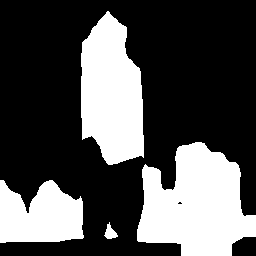

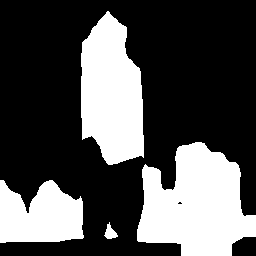

In [ ]:
cv2_imshow(a[0:256,256:512])
cv2_imshow(b[0:256,256:512])

In [ ]:
import segmenter

[180 120 120]
[255 255 255]
[0 0 0]
Loading weights for net_encoder
Loading weights for net_decoder


In [ ]:
!python train.py  --dataset_mode imagefolder --dataroot /content/swapping-autoencoder-pytorch/my_dataset/test_set --num_gpus 1 --batch_size 2 --preprocess scale_shortside_and_crop --load_size 256 --crop_size 256 --display_freq 100 --print_freq 100 --name church_default --patch_use_aggregation True --continue_train True --evaluation_metrics swap_visualization --evaluation_freq 100 --save_freq 100 --total_nimgs 2000 --checkpoints_dir /content/swapping-autoencoder-pytorch/checkpoints

Using /root/.cache/torch_extensions/py37_cu111 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py37_cu111/fused/build.ninja...
Building extension module fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module fused...
Loading custom kernel...
Using /root/.cache/torch_extensions/py37_cu111 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py37_cu111/upfirdn2d/build.ninja...
Building extension module upfirdn2d...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
Loading extension module upfirdn2d...
[180 120 120]
[255 255 255]
[0 0 0]
Loading weights for net_encoder
Loading weights for net_decoder
parsing args...
----------------- Options -----

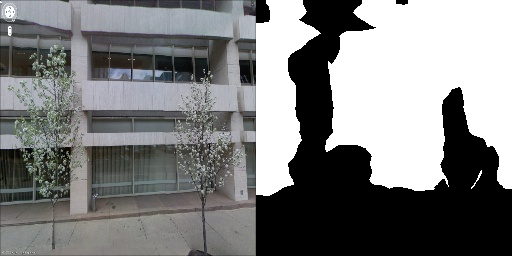

In [ ]:
import cv2
img = cv2.imread('/content/swapping-autoencoder-pytorch/my_dataset/content/image_0.jpg')
img_ = torch.tensor(img)
img_1 = img_.numpy()
a = return_building_images_from_tensor(img)
cv2_imshow(a)

In [ ]:
def apply_my_random_crop(x, target_size, scale_range, num_crops=1, return_rect=False):
    B = x.size(0) * num_crops
    flip = torch.round(torch.rand(B, 1, 1, 1, device=x.device)) * 2 - 1.0
    unit_grid_x = torch.linspace(-1.0, 1.0, target_size, device=x.device)[np.newaxis, np.newaxis, :, np.newaxis].repeat(
        B, target_size, 1, 1)
    unit_grid_y = unit_grid_x.transpose(1, 2)
    unit_grid = torch.cat([unit_grid_x * flip, unit_grid_y], dim=3)
    x = x.unsqueeze(1).expand(-1, num_crops, -1, -1, -1).flatten(0, 1)
    scale = torch.rand(B, 1, 1, 2, device=x.device) * (scale_range[1] - scale_range[0]) + scale_range[0]
    offset = (torch.rand(B, 1, 1, 2, device=x.device) * 2 - 1) * (1 - scale)
    sampling_grid = unit_grid * scale + offset
    crop = F.grid_sample(x, sampling_grid, align_corners=False)
    # while np.count_nonzero(crop[0, 0:3, :, :].permute(2, 1, 0).cpu().numpy() == 0) > 10_000:
    num_trials = 0
    while torch.count_nonzero(crop == 0) > 35_000:
        num_trials += 1
        if num_trials > 10:
            B = x.size(0) * num_crops
            flip = torch.round(torch.rand(B, 1, 1, 1, device=x.device)) * 2 - 1.0
            unit_grid_x = torch.linspace(-1.0, 1.0, target_size, device=x.device)[np.newaxis, np.newaxis, :,
                          np.newaxis].repeat(
                B, target_size, 1, 1)
            unit_grid_y = unit_grid_x.transpose(1, 2)
            unit_grid = torch.cat([unit_grid_x * flip, unit_grid_y], dim=3)
            x = x.unsqueeze(1).expand(-1, num_crops, -1, -1, -1).flatten(0, 1)
            scale = torch.rand(B, 1, 1, 2, device=x.device) * (scale_range[1] - scale_range[0]) + scale_range[0]
            offset = (torch.rand(B, 1, 1, 2, device=x.device) * 2 - 1) * (1 - scale)
            sampling_grid = unit_grid * scale + offset
            crop = F.grid_sample(x, sampling_grid, align_corners=False)
            crop = crop.view(B // num_crops, num_crops, crop.size(1), crop.size(2), crop.size(3))
            return crop
        B = x.size(0) * num_crops
        flip = torch.round(torch.rand(B, 1, 1, 1, device=x.device)) * 2 - 1.0
        unit_grid_x = torch.linspace(-1.0, 1.0, target_size, device=x.device)[np.newaxis, np.newaxis, :,
                      np.newaxis].repeat(
            B, target_size, 1, 1)
        unit_grid_y = unit_grid_x.transpose(1, 2)
        unit_grid = torch.cat([unit_grid_x * flip, unit_grid_y], dim=3)
        x = x.unsqueeze(1).expand(-1, num_crops, -1, -1, -1).flatten(0, 1)
        scale = torch.rand(B, 1, 1, 2, device=x.device) * (scale_range[1] - scale_range[0]) + scale_range[0]
        offset = (torch.rand(B, 1, 1, 2, device=x.device) * 2 - 1) * (1 - scale)
        sampling_grid = unit_grid * scale + offset
        crop = F.grid_sample(x, sampling_grid, align_corners=False)
    else:
        crop = crop.view(B // num_crops, num_crops, crop.size(1), crop.size(2), crop.size(3))
        return crop


def get_my_random_crops(x, crop_window=None):
    patch_size, patch_min_scale, patch_max_scale, patch_num_crops = 128, 0.125, 0.25, 8
    my_crops = []
    while len(my_crops) != patch_num_crops:
        crops = apply_my_random_crop(x, 128, (0.125, 0.25), num_crops=1)
        if crops != None:
            xx = crops[0, 0, :, :, :].permute(1, 2, 0).numpy()
            my_crops.append(xx)
            # cv2.imwrite(str(len(my_crops)) + ".png", xx.astype(np.uint8))
            from google.colab.patches import cv2_imshow
            cv2_imshow(xx.astype(np.uint8))
#            cv2.imshow("", xx.astype(np.uint8))
#            cv2.waitKey(0)
    tensors_stacked = torch.stack(tuple(torch.tensor(i).permute(0, 1, 2) for i in my_crops)).permute(0, 3, 1, 2)
    print("tensor stacked size:", tensors_stacked.size())
    return crops

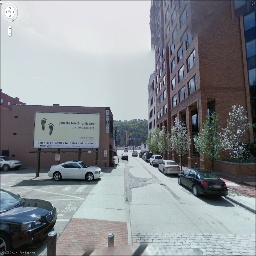

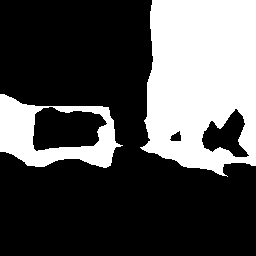

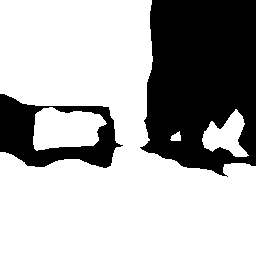

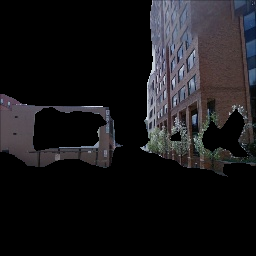

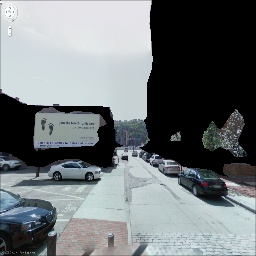

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread(r'/content/swapping-autoencoder-pytorch/my_dataset/content/image_1.jpg')
img_mask = return_building_images_from_localfile(r'/content/swapping-autoencoder-pytorch/my_dataset/content/image_1.jpg')
cv2_imshow(img)
cv2_imshow(img_mask[0:256,256:512])
cv2_imshow(cv2.bitwise_not(img_mask[0:256,256:512]))
masked = cv2.bitwise_and(img, img_mask[0:256,256:512])
cv2_imshow(masked)
masked = cv2.bitwise_and(img,cv2.bitwise_not(img_mask[0:256,256:512]))
cv2_imshow(masked)

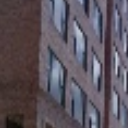

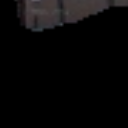

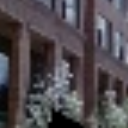

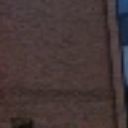

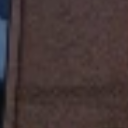

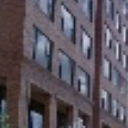

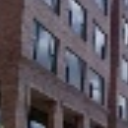

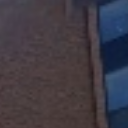

tensor stacked size: torch.Size([8, 3, 128, 128])


In [ ]:
import cv2
import torch
import numpy as np
import torchvision
import torch.nn.functional as F

img = cv2.imread(r'/content/swapping-autoencoder-pytorch/my_dataset/content/image_1.jpg')
img_mask = return_building_images_from_localfile(r'/content/swapping-autoencoder-pytorch/my_dataset/content/image_1.jpg')
masked = cv2.bitwise_and(img, img_mask[0:256,256:512])
img_ = torch.tensor(masked, dtype=torch.float)
img_ = img_[None, :]
img_ = img_.permute(0, 3, 1, 2)
crops = get_my_random_crops(img_)

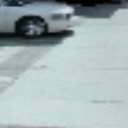

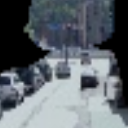

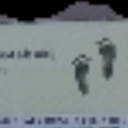

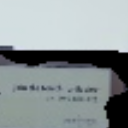

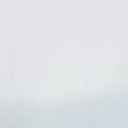

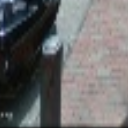

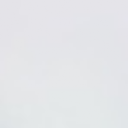

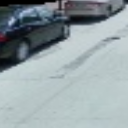

tensor stacked size: torch.Size([8, 3, 128, 128])


In [ ]:
masked = cv2.bitwise_and(img, cv2.bitwise_not(img_mask[0:256,256:512]))
img_ = torch.tensor(masked, dtype=torch.float)
img_ = img_[None, :]
img_ = img_.permute(0, 3, 1, 2)
crops = get_my_random_crops(img_)